# Bike Sharing Assignment
## Building Multiple Linear Regression for BoomBikes 
#### By - Sagar Maru
<hr style=\"border:0.2px solid gray\"> </hr>

## Problem Statement

BoomBikes, a US-based bike-sharing service, is facing a decline in revenue due to the impact of the COVID-19 pandemic. The company relies on a system where bikes are rented for short periods, either for a fee or for free, with users borrowing and returning bikes at computer-controlled docks. Due to the pandemic, the business has seen a considerable drop in demand, making it hard to sustain operations in the current market conditions.

BoomBikes is determined to recover and grow its revenue once the lockdown ends and the economy stabilizes. To do this, they need to better understand the factors that drive the demand for shared bikes. By doing so, they can create a well-thought-out business plan and be ready to meet the needs of customers when normal life resumes. This plan will help them stand out from competitors and position themselves for future growth.

In their effort to understand the market, BoomBikes has contracted a consulting company to analyze the factors that affect bike demand in the US market. They want to identify which variables are significant predictors of bike demand and how well these variables explain the demand trends. The company has already collected a large dataset that includes daily bike demand across the US, along with several independent variables, such as weather patterns and customer preferences.

## Solution

To address BoomBikes business challenge, we will build a multiple linear regression model to predict the demand for shared bikes. The model will be based on the independent variables available in the dataset, such as weather conditions, seasonal trends, and customer behavior. By identifying the most important factors that influence bike demand, we can provide BoomBikes with valuable insights into how the demand fluctuates with different variables.

The objective is to help BoomBikes management team understand the demand patterns in the current market. The model will allow them to make data-driven decisions, enabling them to tailor their business strategy to meet varying levels of demand. With this information, they can adjust their operations to cater to customer preferences and enhance revenue streams. Moreover, the model will serve as a foundation for understanding new markets as the company expands.

By developing this predictive model, BoomBikes will be able to:
- Identify the key factors driving demand for their services.
- Understand how different variables impact bike demand.
- Use insights from the model to make informed business decisions.
- Improve their strategy to meet customer expectations and stay competitive.
- Position themselves to maximize profits when the pandemic ends and demand begins to recover.

In summary, this solution will provide BoomBikes with a clear understanding of demand dynamics, allowing them to strategically prepare for a post-pandemic market. With a robust demand forecasting model, they will be better equipped to address market challenges, optimize resources, and ensure sustainable growth. The insights generated from this model will be key to their long-term success.

## Step 1: Importing Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import calendar

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')

## Step 2: Reading and Understanding the Data


In [2]:
# Read the Dataframe
df_bike_share = pd.read_csv('day.csv');

# Check the Shape of the dataframe
df_bike_share.shape

(730, 16)

In [3]:
# Inspect the first 5 rows of the dataframe
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking for Missing Values
df_bike_share.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It contains 16 columns and 730 rows. The dataset has no missing values, so we don't need to handle them. Some columns, like "mnth," "season," "weekday," and "weathersit," are categorical but have the data type "int64." We will need to address this during data cleaning.

There are also some columns that can be removed. For example, "instant," "dteday," "casual," and "registered" are irrelevant or redundant for our analysis and model building. Dropping these will simplify the dataset and focus on important variables.

In summary, we will clean the data by converting categorical columns to the correct format and removing unnecessary columns to improve the model's accuracy. This ensures the dataset is ready for further analysis and model building.

In [6]:
# Checking for duplicates and dropping the entire duplicate row if any
df_bike_share.drop_duplicates(subset=None, inplace=True)

# Verifying the shape of the dataframe
df_bike_share.shape

(730, 16)

The dataset has no duplicate entries, so we don't need to remove any. This ensures that all the data points are unique, which helps maintain the accuracy of our analysis. Since there are no duplicate or missing values, we can focus on cleaning the data by adjusting categorical variables and removing irrelevant columns. With this preparation, the dataset will be ready for model building and analysis.

## Step 3: Data Cleaning and Manipulation

In [7]:
# Checking out the columns present in the dataframe
df_bike_share.columns.sort_values()

Index(['atemp', 'casual', 'cnt', 'dteday', 'holiday', 'hum', 'instant', 'mnth',
       'registered', 'season', 'temp', 'weathersit', 'weekday', 'windspeed',
       'workingday', 'yr'],
      dtype='object')

### Dropping columns from the dataset

- **instant**:  
  - This is an index column.  
  - Since we already have a default index, it can be removed.  

- **dteday**:  
  - This column contains dates.  
  - We already have separate columns for year and month.  
  - We can perform the analysis without this column, so it can be dropped.  

- **casual** and **registered**:  
  - These columns show bike bookings by different customer categories.  
  - Our goal is to predict total bike count, not by category.  
  - These columns are irrelevant for our analysis and can be removed.  

- **Data Cleaning**:  
  - We will drop the "instant," "dteday," "casual," and "registered" columns from the dataframe as part of the data cleaning process.

In [8]:
# Dropping the unwanted columns
df_bike_share.drop(['casual', 'dteday', 'instant', 'registered'], axis = 1, inplace = True)

# Re-checking the dataframe shape.
df_bike_share.shape

(730, 12)

#### Convert the `mnth` Column
We will convert the `mnth` column from numerical values (1, 2, ..., 11, 12) into categorical labels like January, February, and so on. This will make the data more readable and easier to interpret. Instead of using numbers, we will assign each value to its corresponding month name. This change will help in understanding trends related to specific months during the analysis. By doing this, we ensure that the model correctly treats the month information as categorical data.

In [9]:
# Check the different values for months in descending order
df_bike_share['mnth'].value_counts(ascending = False)

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
# Replace the numbers to different class values of the month
df_bike_share['mnth'] = df_bike_share['mnth'].apply(lambda x: calendar.month_name[x])

# Verify the conversion by checking the value counts.
df_bike_share['mnth'].value_counts(ascending = False)

July         62
October      62
December     62
January      62
May          62
March        62
August       62
June         60
September    60
November     60
April        60
February     56
Name: mnth, dtype: int64

#### Convert the `season` Column
We will convert the `season` column from numerical values into categorical labels based on the data dictionary. The numbers will be replaced as follows: 1 becomes 'Spring', 2 becomes 'Summer', 3 becomes 'Fall', and 4 becomes 'Winter'. This conversion will make the data clearer and more understandable. By assigning descriptive names to the seasons, we ensure that the model treats this information correctly as a categorical variable. This change will help in analyzing trends related to different seasons more effectively.

In [11]:
# Check the existing values for seasons in descending order
df_bike_share['season'].value_counts(ascending = False)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
# Replace the numbers to different class values of season as per data dictionary
df_bike_share['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

# Verify the conversion by checking the value counts.
df_bike_share['season'].value_counts(ascending = False)

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

#### Converting the `weekday` Column

We will convert the `weekday` column from numerical values (0, 1, ..., 5, 6) into categorical labels like Monday, Tuesday, and so on. This change will make the data clearer and easier to understand. Instead of numbers, each value will represent its corresponding day of the week. This will help in identifying patterns based on specific weekdays during the analysis. By converting this column, we ensure that the model treats the day of the week as a categorical variable for better accuracy in predictions.

In [13]:
# Check the existing values for weekday in descending order
df_bike_share['weekday'].value_counts(ascending = False)

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [14]:
# Replace the numbers to different class values of weekday
df_bike_share['weekday'] = df_bike_share['weekday'].apply(lambda x: calendar.day_name[x])

# Verify the conversion by checking the value counts.
df_bike_share['weekday'].value_counts(ascending = False)

Sunday       105
Tuesday      105
Monday       105
Saturday     104
Friday       104
Wednesday    104
Thursday     103
Name: weekday, dtype: int64

#### Convert the `weathersit` Column

We will convert the `weathersit` column into a categorical variable to improve data clarity. According to the data dictionary, there are four types of weather conditions, but the column only shows three entries. We need to map these entries to the correct categories as follows:

1. **Good**: This category includes:
   - Clear
   - Few clouds
   - Partly cloudy
   - Partly cloudy

2. **Moderate**: This category includes:
   - Mist + Cloudy
   - Mist + Broken clouds
   - Mist + Few clouds
   - Mist

3. **Bad**: This category includes:
   - Light Snow
   - Light Rain + Thunderstorm + Scattered clouds
   - Light Rain + Scattered clouds

4. **Severe**: This category includes:
   - Heavy Rain + Ice Pallets + Thunderstorm + Mist
   - Snow + Fog

To ensure consistency, we will map the numerical values (1 to 4) to these categories. This will standardize the weather data across the dataset and make it easier to analyze. Replacing the values with these labels will help in understanding the impact of different weather conditions on bike demand.

In [15]:
# Check the existing values for weather in descending order
df_bike_share['weathersit'].value_counts(ascending = False)

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
# Replace the numbers to different class values of weathersit
df_bike_share['weathersit'].replace({ 1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe' }, inplace = True)

# Confirm using the above values to ensure successful conversion.
df_bike_share['weathersit'].value_counts(ascending = False)

Good        463
Moderate    246
Bad          21
Name: weathersit, dtype: int64

In [17]:
# Re-checking the dataframe after data cleaning and manipulation
df_bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Exploratory Data Analysis (EDA)

In this step, we will perform several important tasks:

- **Check for linear relationships**: We will determine if the variables are linearly related. This is crucial if we plan to use a linear model for prediction.
  
- **Check for multicollinearity**: We will assess if multicollinearity exists between the independent variables. This happens when two or more variables are highly correlated, which can affect model accuracy.

- **Identify strong correlations**: We will look for predictors that have a strong association with the outcome variable. This will help us understand which factors influence the target variable most.

To achieve these goals, we will visualize the data using the Python libraries **matplotlib** and **seaborn**. These visualizations will give us a clear picture of the relationships and correlations in the dataset. By using charts and plots, we can easily spot patterns, trends, and any potential issues, such as multicollinearity or non-linear relationships.

EDA helps in refining the dataset and ensures that our data is well-prepared for model building. With the insights gained from this analysis, we can make informed decisions on which variables to include in our final model.

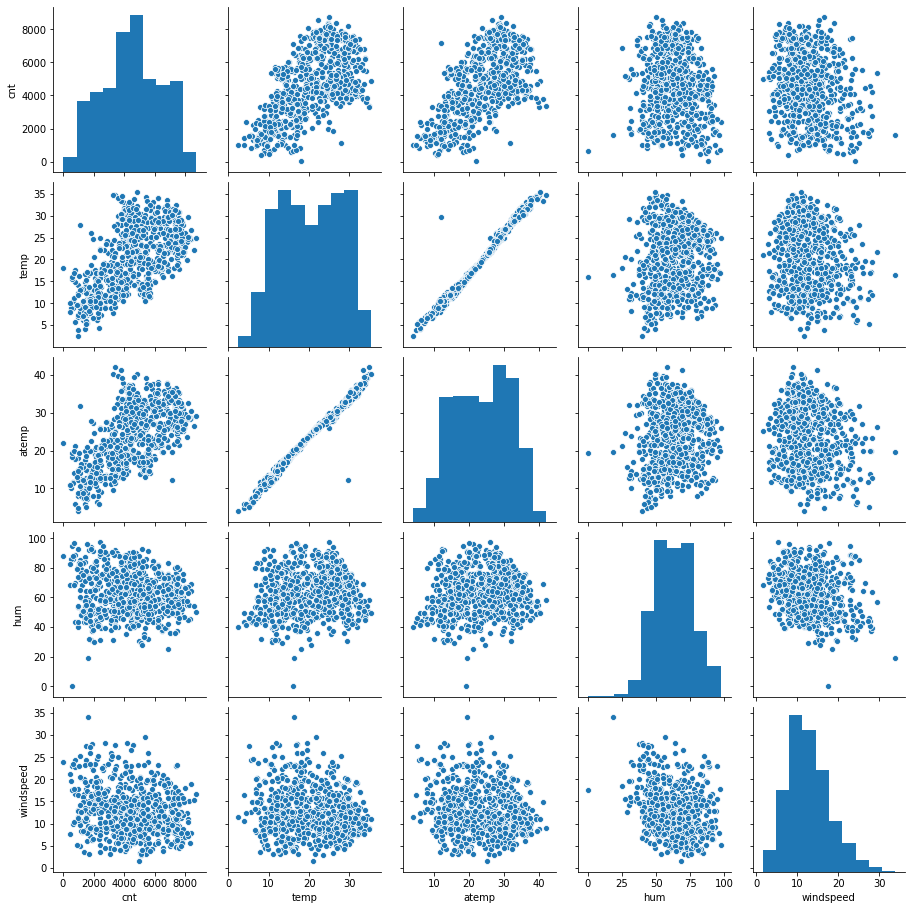

In [18]:
# Customizing the pairplot with a color palette
sns.pairplot(data=df_bike_share, vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'], palette='lightblue')
plt.show()

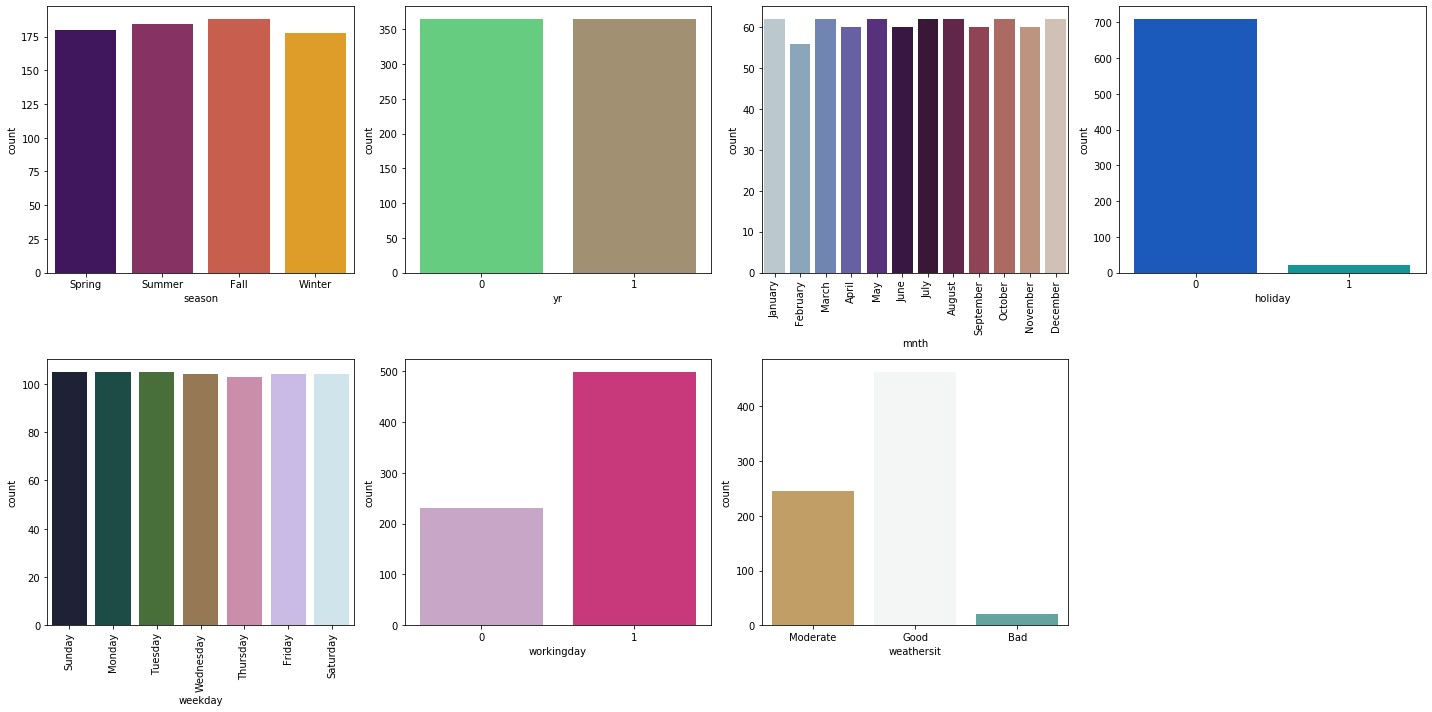

In [19]:
# Analysing the categorical variables
categorical_vars = {
    'season': { 'rotation': 0, 'palette': 'inferno' },
    'yr': { 'rotation': 0, 'palette': 'terrain' },
    'mnth': { 'rotation': 90, 'palette': 'twilight' },
    'holiday': { 'rotation': 0, 'palette': 'winter' },
    'weekday': { 'rotation': 90, 'palette': 'cubehelix' },
    'workingday': { 'rotation': 0, 'palette': 'PuRd' },
    'weathersit': { 'rotation': 0, 'palette': 'BrBG' }
}

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, (cat, config) in enumerate(categorical_vars.items()):
    sns.countplot(data = df_bike_share, x = cat, palette = config['palette'], ax = ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_xticklabels(ax[i // 4, i % 4].get_xticklabels(), rotation = config['rotation'])

# Hide the last column
ax[1, 3].axis('off')

plt.tight_layout()
plt.show()

- **Weather Impact**:
  - Bike rentals increase in favorable weather conditions.  
  - People prefer renting bikes when the weather is pleasant.

- **Working Days and Non-Holidays**:
  - Bike rentals are higher on working days.  
  - Rentals are also more frequent on non-holidays.  
  - This indicates a strong preference for bike rentals during typical workdays and regular days without holidays.

- **Other Categorical Variables**:
  - Minimal variation is seen in other categorical variables.  
  - Categories such as season or weather situation do not show significant differences in bike rental patterns.

This summary highlights that weather and the type of day significantly influence bike rentals, while other variables show less impact.

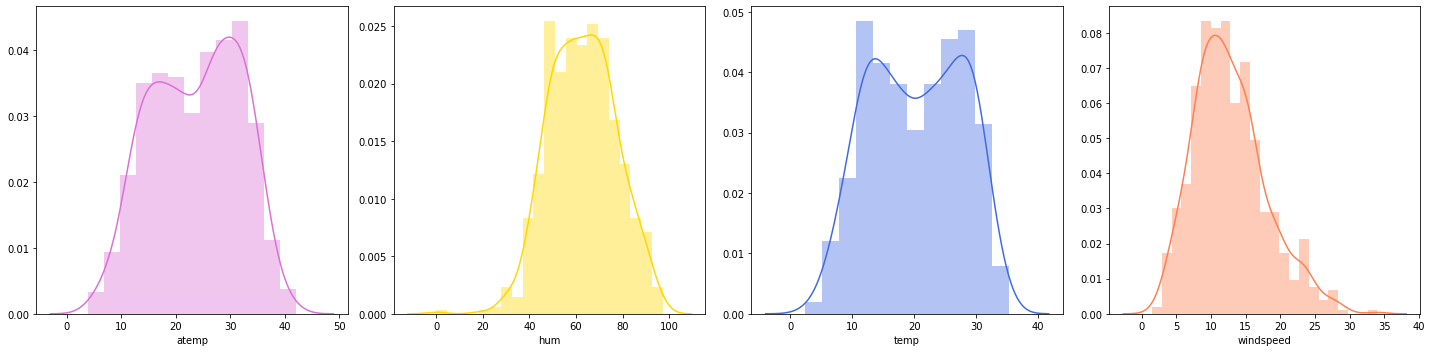

In [20]:
# Analysing the numerical (continuous) variables
numerical_vars = {
    'atemp': {'color': 'orchid'},
    'hum': {'color': 'gold'},
    'temp': {'color': 'royalblue'},
    'windspeed': {'color': 'coral'}
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Loop through the continuous variables and plot histograms
for i, (cont, config) in enumerate(numerical_vars.items()):
    # Using histplot (if you update seaborn to a version that supports it)
    try:
        sns.histplot(data=df_bike_share, x=cont, ax=ax[i], color=config['color'], kde=True)
    except AttributeError:
        # Fallback to distplot for older seaborn versions
        sns.distplot(df_bike_share[cont], ax=ax[i], color=config['color'], kde=True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

- **Average temperature (temp)**:  
  - Bikes were rented at an average temperature of 20°C.  

- **Feeling temperature (atemp)**:  
  - The average feeling temperature during bike rentals was around 24°C.  

- **Humidity (hum)**:  
  - The average humidity during bike rentals was approximately 62.  

- **Windspeed (windspeed)**:  
  - The average windspeed during bike rentals was around 12.  

These values reflect the typical weather conditions when bikes were rented. The moderate temperatures and wind speed, along with a humidity level in the low 60s, suggest that weather conditions were generally comfortable for outdoor activities such as biking.

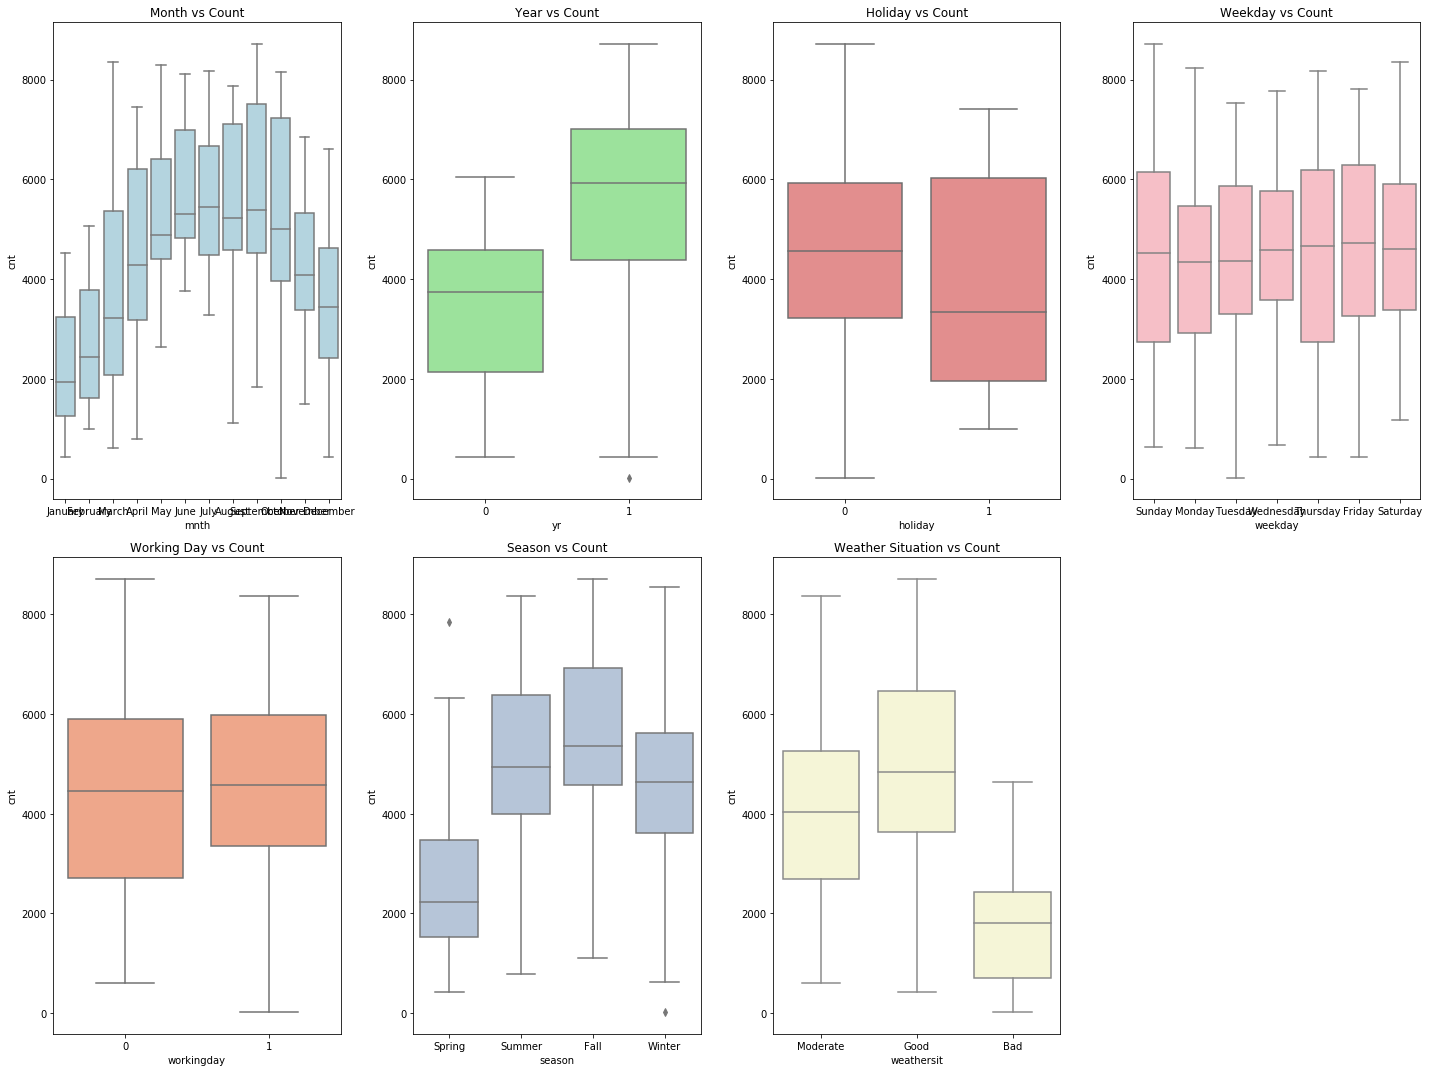

In [21]:
# Visualising Categorical Variables : Using a boxplot

# plt.figure(figsize = (15, 15))
# for i, (cat, config) in enumerate(categorical_vars.items()):
#     plt.subplot(3, 3, i+1)
#     sns.boxplot(data = df_bike_share, x = cat, y = 'cnt')
#     plt.xticks(rotation = config['rotation'])

# plt.tight_layout()    
# plt.show()

# Set figure size and layout
plt.figure(figsize=(20, 15))

# Define colors for the box plots
box_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightsteelblue', 'lightgoldenrodyellow']

# Plot boxplots for each categorical variable
plt.subplot(2, 4, 1)
sns.boxplot(x='mnth', y='cnt', data=df_bike_share, color=box_colors[0])
plt.title('Month vs Count')

plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=df_bike_share, color=box_colors[1])
plt.title('Year vs Count')

plt.subplot(2, 4, 3)
sns.boxplot(x='holiday', y='cnt', data=df_bike_share, color=box_colors[2])
plt.title('Holiday vs Count')

plt.subplot(2, 4, 4)
sns.boxplot(x='weekday', y='cnt', data=df_bike_share, color=box_colors[3])
plt.title('Weekday vs Count')

plt.subplot(2, 4, 5)
sns.boxplot(x='workingday', y='cnt', data=df_bike_share, color=box_colors[4])
plt.title('Working Day vs Count')

plt.subplot(2, 4, 6)
sns.boxplot(x='season', y='cnt', data=df_bike_share, color=box_colors[5])
plt.title('Season vs Count')

plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=df_bike_share, color=box_colors[6])
plt.title('Weather Situation vs Count')

# Show the plot
plt.tight_layout()
plt.show()

- **Rentals are lower during holidays.**  
  - Fewer people rent bikes on holidays.

- **Bike rentals increase on working days.**  
  - Rentals are higher on regular working days compared to holidays.

- **Working day bookings are stable.**  
  - The "Workingday" boxplot shows median rentals between 4000 and 6000, with little variation between working and non-working days.
  
- **Weather impacts bike rentals.**  
  -  People prefer renting bikes when the weather is good. People rent bikes more frequently in favorable weather conditions like clear skies or partly cloudy days.

- **Higher bike rentals on working days.**  
  - Bike rentals are higher on working days and lower on holidays.

- **Minimal variation in other categorical variables.**  
  - Variations in rentals across categories like season or weekday are minimal.

- **Graphs reveal qualitative data distributions.**  
  - These graphs provide insights into data patterns, helping confirm predictions made by the model.

- **Fall has the highest bike rental demand.**  
  - The season with the highest median rentals is Fall, while Spring sees the least demand.

- **Higher rentals in 2019 than 2018.**  
  - The year 2019 had more bike rentals compared to 2018.

- **Consistent rentals throughout the week.**  
  - The count of rentals remains almost even across all days of the week.

- **No rentals during adverse weather.**  
  - Heavy rain or snow results in no rentals, while the highest rentals occur during clear or partly cloudy weather.

- **Rentals peaked in September.**  
  - Rentals were highest in September and declined in December, likely due to snowfall.

### Bivariate Analysis

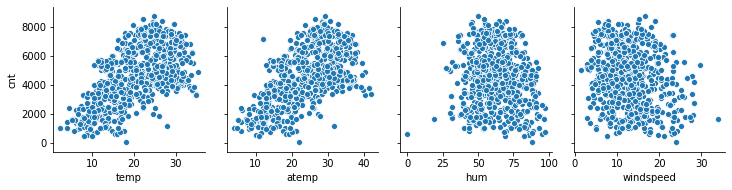

In [22]:
# creating a pairplot between the numerical variables
sns.pairplot(data=df_bike_share,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

In [23]:
# Calculate the correlation matrix for numerical variables including 'cnt'
numerical_columns = list(numerical_vars.keys()) + ['cnt']
correlation_matrix = df_bike_share[numerical_columns].corr()

# Display the correlation matrix
correlation_matrix

,atemp,hum,temp,windspeed,cnt
atemp,1.000000,0.141512,0.991696,-0.183876,0.630685
hum,0.141512,1.000000,0.128565,-0.248506,-0.098543
temp,0.991696,0.128565,1.000000,-0.158186,0.627044
windspeed,-0.183876,-0.248506,-0.158186,1.000000,-0.235132
cnt,0.630685,-0.098543,0.627044,-0.235132,1.000000


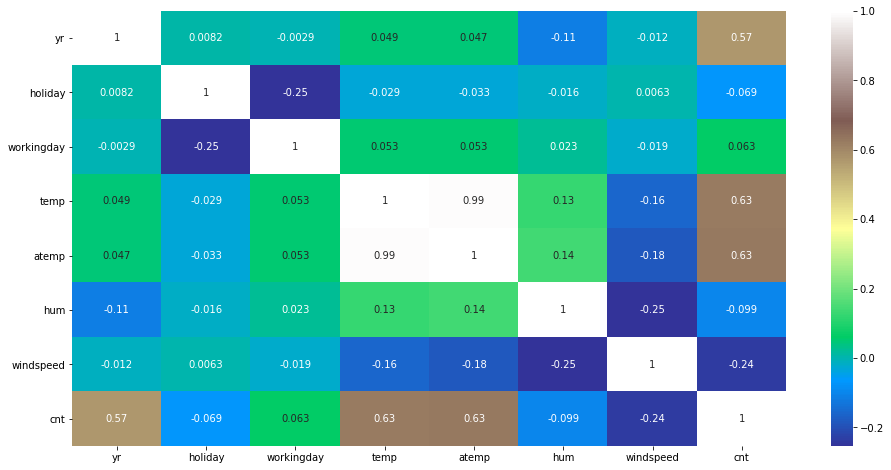

In [24]:
# Heatmap for correlation between variables

plt.figure(figsize=(16,8))
sns.heatmap(df_bike_share.corr(),cmap="terrain",annot=True)
plt.show()

- **Negative Correlation**:  
  - There is a negative correlation between `cnt` (bike count) and the following variables:
    - **Holiday**
    - **Humidity (hum)**
    - **Windspeed**

- **Positive Correlation**:  
  - There is a positive correlation between `cnt` and these variables:
    - **Year (yr)**
    - **Working day**
    - **Temperature (temp)**
    - **Feeling temperature (atemp)**

- **High Correlation between temp and atemp**:  
  - A high correlation exists between `temp` and `atemp`.  
  - This supports the observation that they are nearly identical.

- **Summary**:  
  - Bike rentals decrease on holidays, with higher humidity and windspeed.
  - Rentals increase with warmer temperatures and on working days.
  - The similarity between temperature and feeling temperature suggests these two variables provide redundant information.

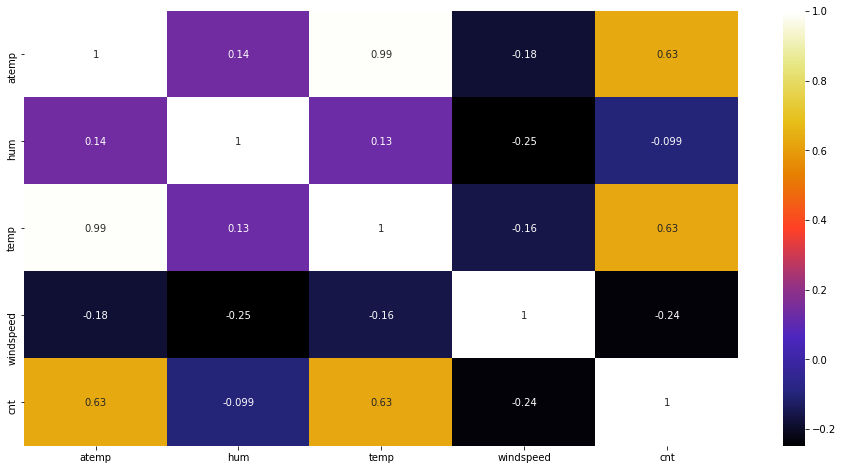

In [25]:
# Heatmap for correlation between numerical variables

plt.figure(figsize = (16, 8))
corr_df = df_bike_share[list(numerical_vars.keys()) + ['cnt']].corr()
sns.heatmap(data = corr_df, annot = True, cmap = 'CMRmap')
plt.show()

- **Strong correlation between `atemp` and `temp` with `cnt`**:  
  - Both `atemp` (feeling temperature) and `temp` (actual temperature) show a strong link with the number of bike rentals (`cnt`).  
  - This indicates that favorable temperatures lead to more biking.

- **Potential redundancy of `atemp` and `temp`**:  
  - Since `atemp` and `temp` are strongly correlated, they may be redundant.  
  - Consider using feature elimination to evaluate and possibly remove one of these variables.

- **Negative correlation of `windspeed` and `hum` with bike rentals**:  
  - Both `windspeed` and `humidity` are negatively correlated with bike rentals.  
  - This suggests that high wind speeds and humidity create less favorable biking conditions.

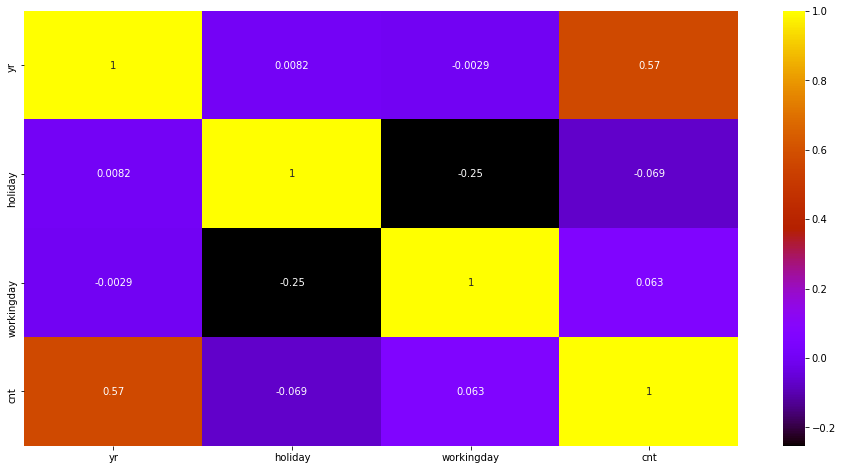

In [26]:
# Heatmap for correlation between categorical variables
plt.figure(figsize = (16, 8))
corr_df = df_bike_share[list(categorical_vars.keys()) + ['cnt']].corr()
sns.heatmap(data = corr_df, annot = True, cmap = 'gnuplot')
plt.show()

- **Negative Correlation**:
  - There is a negative correlation between `cnt` (bike count) and `holiday`.
  - This means bike rentals decrease during holidays.

- **Positive Correlations**:
  - There is a positive correlation between `cnt` and `yr` (year).
  - There is also a positive correlation between `cnt` and `workingday`.
  - This indicates that bike rentals increase in later years and on working days.

- **Strongest Positive Correlation**:
  - The variable `yr` shows the strongest positive correlation among all categorical variables.
  - This suggests that bike rentals have the highest increase with the passing years.

These correlations help understand how different factors affect bike rentals.

## Step 5: Data Preparation for Building Linear Regression Model

In [27]:
print("Shape of the Dataframe:", df_bike_share.shape)

df_bike_share.head()

Shape of the Dataframe: (730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


### Creation of Dummy Variables (One Hot Encoding)

- **Dummy Variables**:  
  - Dummy variables are needed only if categorical values have more than two unique values.  
  - We create dummy variables to represent each unique category.  
  - The number of dummy variables needed is equal to the number of unique categories minus one.  
  - This approach prevents multicollinearity by avoiding redundant information.  

- **Column Dropping**:  
  - We can drop any one of the dummy variables.  
  - Typically, we drop the first dummy variable created.  
  - Dropping one dummy variable helps avoid multicollinearity in the model.  

In summary, dummy variables are used for categorical data with more than two unique values. We usually create one less dummy variable than the number of categories and drop one of them, often the first, to ensure the model remains accurate and efficient.

In [28]:
# Checking with unique values in categorical columns
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_bike_share[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

- The categorical variables with more than 2 unique values are:  
  - **Season**  
  - **Month (mnth)**  
  - **Weekday**  
  - **Weather situation (weathersit)**  

- Dummy variables will be created only for these columns.  

This approach ensures that each categorical variable with multiple unique values is properly represented in the model.

In [29]:
df_bike_share = pd.get_dummies(data = df_bike_share, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True, prefix = '', prefix_sep = '')

- **Dropping the first column**:  
  - Reduces the number of dummy variables.  
  - This is done for each categorical variable: season, month, weekday, and weathersit.

- **Dummy variables**:  
  - For each category, we use (n - 1) dummy variables.  
  - This is because one column is dropped to avoid redundancy.

- **Purpose**:  
  - Helps in preventing multicollinearity in the model.  
  - Simplifies the dataset while retaining all necessary information.

In [30]:
print("Shape of the Dataframe:", df_bike_share.shape)

# Re-checking the updated dataframe
df_bike_share.head()

Shape of the Dataframe: (730, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,1,0


In [31]:
# Re-checking the updated columns in dataframe
df_bike_share.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Good', 'Moderate'],
      dtype='object')

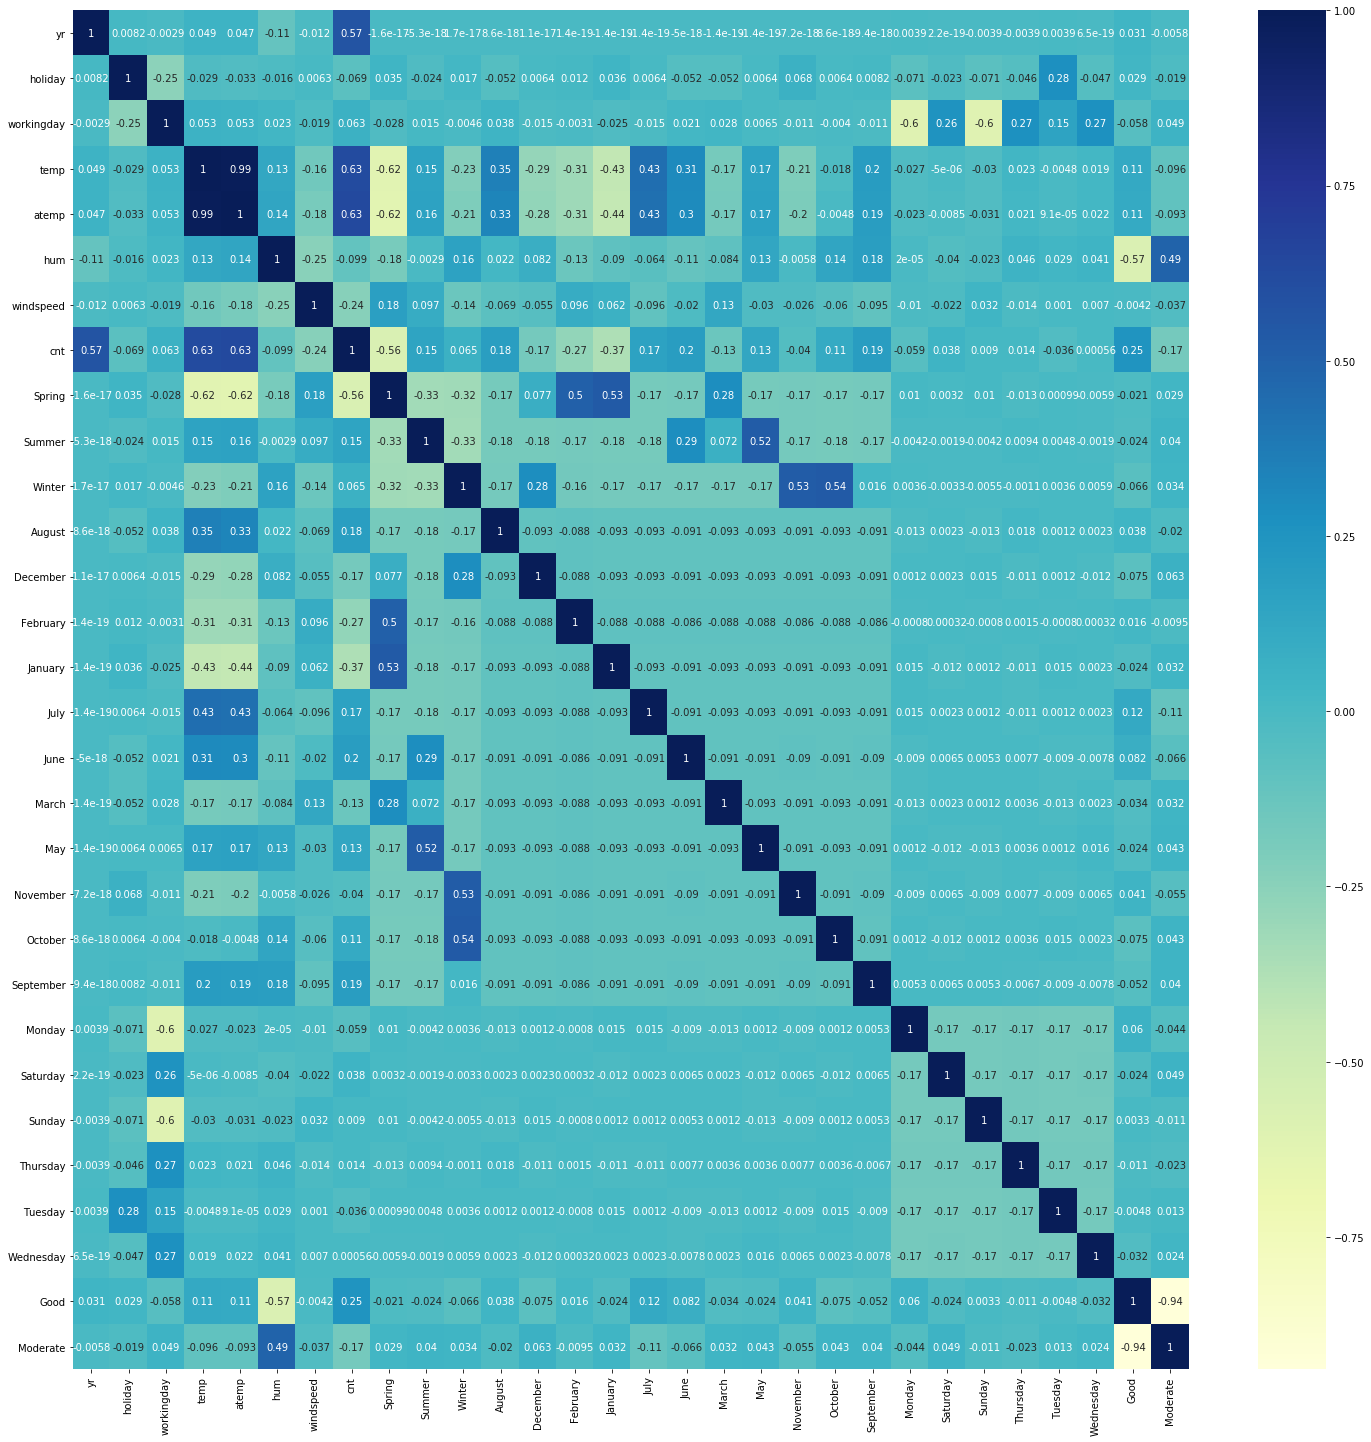

In [32]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize = (25, 25))
corr_df = df_bike_share[list(df_bike_share.columns)].corr()
sns.heatmap(data = corr_df, annot = True, cmap = 'YlGnBu')
plt.show()

## Step 6: Model Building

In [33]:
# Assign feature variables to X and the dependent variable `cnt` to y
X = df_bike_share.drop('cnt', axis = 1)
y = df_bike_share['cnt']

### Dividing the Dataset into Training and Test Sets

In [34]:
# Split the data - Divide it into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [35]:
# Checking the shape and size for train dataset
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)

# Checking the shape and size for test dataset
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (511, 29)
y_train Shape:  (511,)
X_test Shape:  (219, 29)
y_test Shape:  (219,)


In [36]:
# Inspecting the training dataset
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,20.106483,23.499390,63.109443,12.833686,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.142857,0.127202,0.154599,0.158513,0.150685,0.133072,0.626223,0.344423
std,0.500412,0.157613,0.468042,7.424445,8.083052,14.142965,5.286912,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.350270,0.333525,0.361876,0.365579,0.358092,0.339986,0.484280,0.475645
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.649576,16.634475,52.291650,9.041918,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.260847,24.115200,63.416700,12.124789,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.208350,15.750595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Scaling using StandardScaler

- **Feature Scaling**: 
  - Feature scaling is crucial for machine learning models.  
  - It helps to standardize the range of features.  

- **StandardScaler**:  
  - StandardScaler is a common preprocessing technique.  
  - It transforms features to have a mean of 0 and a standard deviation of 1.  

- **Purpose**:  
  - The transformation ensures all features have the same scale.  
  - This is important for algorithms that are sensitive to feature magnitudes.  

- **Benefits**:  
  - Consistent scales help improve the performance of machine learning models.  
  - It allows algorithms to converge faster and perform better.  

- **Application**:  
  - Apply StandardScaler to each feature in your dataset.  
  - This preprocessing step is typically done before training a model.  

In summary, StandardScaler standardizes features, making them have a mean of 0 and a standard deviation of 1. This ensures that machine learning algorithms handle features consistently and effectively.

In [38]:
# Use StandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

# Only Transform Test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [39]:
# Re-checking it after scaling the training dataset
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
653,0.98254,-0.161569,0.690564,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,3.257858,-0.295354,-0.408248,-0.381759,-0.427633,-0.434019,-0.421212,2.552392,0.772577,-0.724826
576,0.98254,-0.161569,0.690564,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,-0.427633,-0.434019,-0.421212,2.552392,0.772577,-0.724826
426,0.98254,-0.161569,-1.448092,-0.421405,-0.349813,-0.069675,-0.386500,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,2.338451,-0.434019,-0.421212,-0.391789,-1.294370,1.379641
728,0.98254,-0.161569,-1.448092,-1.296629,-1.475441,-1.045794,2.019569,1.766626,-0.572078,-0.575091,...,-0.306950,-0.295354,2.449490,-0.381759,-0.427633,-0.434019,-0.421212,-0.391789,0.772577,-0.724826
482,0.98254,-0.161569,-1.448092,-0.628694,-0.572645,-1.001559,-0.781062,-0.566051,1.748015,-0.575091,...,-0.306950,-0.295354,-0.408248,-0.381759,2.338451,-0.434019,-0.421212,-0.391789,-1.294370,1.379641


In [40]:
X_train_scaled.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Good,Moderate
count,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,...,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02
mean,2.694083e-16,-2.711464e-16,1.911930e-16,-6.680892e-17,2.198720e-16,-2.861377e-16,-1.067313e-16,4.128031e-17,-1.338351e-16,5.344714e-17,...,1.659903e-16,1.036353e-16,3.693501e-18,-1.499127e-17,-1.659903e-16,9.038215e-17,1.562134e-16,9.994180e-17,1.920621e-16,7.647720e-17
std,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,...,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00
min,-1.017770e+00,-1.615686e-01,-1.448092e+00,-2.383944e+00,-2.420505e+00,-4.466622e+00,-1.893185e+00,-5.660507e-01,-5.720776e-01,-5.750906e-01,...,-3.069502e-01,-2.953541e-01,-4.082483e-01,-3.817590e-01,-4.276335e-01,-4.340185e-01,-4.212118e-01,-3.917893e-01,-1.294370e+00,-7.248263e-01
25%,-1.017770e+00,-1.615686e-01,-1.448092e+00,-8.705342e-01,-8.501297e-01,-7.656381e-01,-7.179018e-01,-5.660507e-01,-5.720776e-01,-5.750906e-01,...,-3.069502e-01,-2.953541e-01,-4.082483e-01,-3.817590e-01,-4.276335e-01,-4.340185e-01,-4.212118e-01,-3.917893e-01,-1.294370e+00,-7.248263e-01
50%,9.825399e-01,-1.615686e-01,6.905640e-01,2.081170e-02,7.625995e-02,2.174636e-02,-1.342167e-01,-5.660507e-01,-5.720776e-01,-5.750906e-01,...,-3.069502e-01,-2.953541e-01,-4.082483e-01,-3.817590e-01,-4.276335e-01,-4.340185e-01,-4.212118e-01,-3.917893e-01,7.725769e-01,-7.248263e-01
75%,9.825399e-01,-1.615686e-01,6.905640e-01,8.776067e-01,8.270210e-01,7.147584e-01,5.522631e-01,-5.660507e-01,-5.720776e-01,-5.750906e-01,...,-3.069502e-01,-2.953541e-01,-4.082483e-01,-3.817590e-01,-4.276335e-01,-4.340185e-01,-4.212118e-01,-3.917893e-01,7.725769e-01,1.379641e+00
max,9.825399e-01,6.189321e+00,6.905640e-01,2.052245e+00,2.296606e+00,2.401583e+00,4.007457e+00,1.766626e+00,1.748015e+00,1.738857e+00,...,3.257858e+00,3.385766e+00,2.449490e+00,2.619454e+00,2.338451e+00,2.304049e+00,2.374103e+00,2.552392e+00,7.725769e-01,1.379641e+00


### Selecting Features using Recursive Feature Elimination (RFE) approach

- **Recursive Feature Elimination (RFE)**:  
  - RFE is a machine learning technique for feature selection.  
  - It eliminates the least important features step by step.  
  - This helps in identifying the most relevant features for better model accuracy.  
  - The goal is to improve both model performance and efficiency.

- **Steps in RFE**:  
  - Start with all features in the dataset.  
  - Train the model using these features.  
  - Rank the features based on their importance.  
  - Remove the least important feature.  
  - Repeat the process until the desired number of features remains.  

- **Selecting Top 15 Features**:  
  - Using RFE, the top 15 features are selected.  
  - These features are the most important for predicting the outcome variable.  
  - The reduced set of features simplifies the model while retaining high accuracy.  

- **Advantages of RFE**:  
  - It helps in reducing overfitting by removing irrelevant or redundant features.  
  - Simplifies the model, making it more interpretable.  
  - Improves computational efficiency by reducing the number of features.  

In conclusion, RFE is a powerful method to enhance model performance by focusing on the most relevant features, and here we select the top 15 features for our model.

In [41]:
# Create and train the model with RFE (Recursive Feature Elimination)
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train_scaled, y_train)

In [42]:
#List of variables selected in top 15 list
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 9),
 ('December', False, 2),
 ('February', False, 3),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [43]:
# Get the columns which are selected using RFE approach
selectedRFE_features = X_train_scaled.columns[rfe.support_]

# Checking column names which are selected
selectedRFE_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'January', 'July', 'November', 'September', 'Monday', 'Good',
       'Moderate'],
      dtype='object')

In [44]:
# checking which columns has been rejected
rejectedRFE_features = X_train.columns[~rfe.support_]

# Checking column names which are rejected
rejectedRFE_features

Index(['workingday', 'atemp', 'August', 'December', 'February', 'June',
       'March', 'May', 'October', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

### Creating Utility Functions

These three Python utility methods are designed to enhance data modeling, feature selection, and evaluation. They offer reusable and flexible solutions for machine learning workflows, especially in regression analysis. Below is an introduction to each of these methods:

1. **Adjusted R2 Score Calculation**:
   The `adjusted_r2_score` method calculates the adjusted R-squared value, a metric used to evaluate the goodness of fit of a regression model. Unlike the standard R-squared, the adjusted version accounts for the number of features in the model. This ensures that adding unnecessary variables is penalized, making the score more accurate for models with multiple predictors. The function is versatile and can handle various datasets, ensuring reliability even when the sample size is close to the number of features.

2. **Variance Inflation Factor (VIF) Calculation**:
   The `calculate_VIF` function evaluates multicollinearity between features. High VIF values indicate strong correlations among independent variables, which can distort the model’s predictive ability. By identifying and filtering features with high VIF, this function helps refine models, ensuring they remain efficient and interpretable. It also includes a threshold feature that allows users to exclude highly collinear variables automatically. This utility is crucial for selecting features and reducing overfitting.

3. **Model Generation with Summary**:
   The `generate_model_with_summary` method fits an Ordinary Least Squares (OLS) regression model using the `statsmodels` library. It provides detailed output, including the model summary, residuals, and predictions. This tool simplifies the model-fitting process, allowing users to quickly assess the quality of their regression model and identify influential features. Additionally, the option to return residuals and predictions adds flexibility for post-analysis tasks.

Together, these utilities streamline the modeling process, enhance feature selection, and provide key performance insights.

In [45]:
# from sklearn.metrics import r2_score

def adjusted_r2_score(y_true, y_pred, n_features, n_samples=None):
    """
    Calculate the adjusted R-squared (R2_adj) score.
    
    This updated version includes error handling and support for cases where the number of samples is passed explicitly.

    Parameters:
    - y_true (array-like): True target values.
    - y_pred (array-like): Predicted values.
    - n_features (int): Number of features (independent variables) in the model.
    - n_samples (int, optional): Number of samples in the data. If not provided, it defaults to len(y_true).

    Returns:
    - float: Adjusted R-squared score.
    """
    r2 = r2_score(y_true, y_pred)
    n_samples = n_samples if n_samples else len(y_true)
    
    if n_samples <= n_features + 1:
        raise ValueError("Number of samples must be greater than the number of features + 1.")
    
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

In [46]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

def calculate_VIF(X_train, threshold=5.0):
    """
    Calculate Variance Inflation Factor (VIF) for features in the training set and optionally filter features with high VIF.
    
    Parameters:
    - X_train (pd.DataFrame): Input features in the training set.
    - threshold (float, optional): Filter to only return features with VIF below this threshold (default is 5.0).
    
    Returns:
    - pd.DataFrame: DataFrame containing Features and their corresponding VIF values, sorted by VIF.
    """
    if X_train.shape[1] < 2:
        raise ValueError("VIF calculation requires at least two features.")
    
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)

    # Filter based on the threshold
    filtered_vif = vif[vif['VIF'] < threshold]
    
    return filtered_vif if not filtered_vif.empty else vif


In [47]:
# import statsmodels.api as sm
# import pandas as pd

def fit_ols_model_with_summary(X_train, y_train, return_residuals=False):
    """
    Generate and fit an Ordinary Least Squares (OLS) model using statsmodels,
    print the model summary, and return a dictionary with model details.

    Parameters:
    - X_train (pd.DataFrame): Features for training.
    - y_train (pd.Series): Target variable for training.
    - return_residuals (bool, optional): Whether to include residuals and predictions in the output. Default is False.

    Returns:
    dict: A dictionary containing:
        - 'model': Fitted OLS model.
        - 'X_train_sm': Features with added constant term.
        - 'residuals' (optional): Residuals of the model.
        - 'predictions' (optional): Predicted values by the model.
    """
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    
    print(model.summary())
    
    result = { 'model': model, 'X_train_sm': X_train_sm }
    
    if return_residuals:
        predictions = model.predict(X_train_sm)
        residuals = y_train - predictions
        result['predictions'] = predictions
        print("Predictions: ", result['predictions'])
        result['residuals'] = residuals
        print("Residuals: ", result['residuals'])
    
    return result

### Manual Feature Elimination using `statsmodels` and `VIF`

#### Key steps in performing manual feature elimination:

- **Multicollinearity**: Identify and address high correlation between features that can distort the model.
- **Overfitting**: Remove unnecessary features to prevent the model from fitting random noise in the data.
- **Interpretability**: Simplify the model by reducing the number of features for easier interpretation.
- **Model Performance**: Improve computational efficiency and the model’s ability to generalize to new data.
- **Data Quality**: Eliminate irrelevant or redundant features to clean the dataset and improve accuracy.

#### Process for Manual Feature Elimination:
- **Identify p-values**: Check features with p-values greater than 0.05. These variables are statistically insignificant and contribute little to the model.
- **Analyze VIF**: Examine Variance Inflation Factor (VIF) values. Features with VIF greater than 5 indicate multicollinearity and should be removed.
  
Through this process, we iteratively remove features that weaken the model and improve its overall performance.

### Model 1: Fitting the Initial Linear Models using Statsmodels
Building the initial model using the top features selected through the RFE method.

In [48]:
# Create a dataframe from the selected columns from RFE
X_train_rfe_featured = X_train_scaled[selectedRFE_features]

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured, y_train, True)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured, 25)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.37e-192
Time:                        18:11:11   Log-Likelihood:                -4114.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     34.117    131.646      0.0

,Features,VIF
13,Good,10.29
14,Moderate,8.91
5,Spring,5.20
2,temp,3.97
7,Winter,3.77
6,Summer,2.68
3,hum,1.91
8,January,1.57
9,July,1.49
10,November,1.49


### Model 2 - Dropping `Good` Column

- Remove the `Good` column from the linear regression model.  
- The `Good` column has a high Variance Inflation Factor (VIF) of 10.29.  
- High VIF indicates strong multicollinearity with other features.  
- Removing this column will improve the model's performance and accuracy.  
- This step ensures a more reliable and interpretable regression model.

In [49]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_2 = X_train_rfe_featured.drop(['Good'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured_Model_2, y_train, True)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_2, 25)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          7.22e-175
Time:                        18:11:11   Log-Likelihood:                -4157.3
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     496   BIC:                             8408.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.093    121.082      0.0

,Features,VIF
5,Spring,5.18
2,temp,3.89
7,Winter,3.77
6,Summer,2.67
3,hum,1.61
8,January,1.57
9,July,1.49
10,November,1.48
13,Moderate,1.40
11,September,1.31


### Model 3 - Dropping `November` Column
- Remove the `November` column.
- It has a high p-value of 0.276.
- High p-values indicate weak evidence against the null hypothesis.
- The column does not contribute significantly to the model.
- Dropping it improves model accuracy and simplicity.

In [50]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_3 = X_train_rfe_featured_Model_2.drop(['November'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured_Model_3, y_train, False)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          9.67e-176
Time:                        18:11:11   Log-Likelihood:                -4157.9
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     497   BIC:                             8403.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.100    121.059      0.0

,Features,VIF
2,temp,3.81
7,Winter,3.59
6,Summer,2.64
3,hum,1.61
8,January,1.56
9,July,1.49
12,Moderate,1.40
10,September,1.30
4,windspeed,1.16
0,yr,1.04


### Model 4 - Dropping `January` Column

- Remove the `January` column from the model due to its high p-value of 0.162.
- A high p-value indicates that the variable is not statistically significant in predicting the outcome.
- The p-value suggests that `January` does not have a strong influence on the dependent variable.
- Keeping this column may reduce model accuracy and efficiency.
- Removing insignificant variables like `January` improves model performance.
- This step helps avoid overfitting and ensures the model focuses on relevant predictors.
- The exclusion simplifies the model and enhances interpretability.

In [51]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_4 = X_train_rfe_featured_Model_3.drop(['January'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured_Model_4, y_train, False)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_4, 15)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.82e-176
Time:                        18:11:11   Log-Likelihood:                -4158.9
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     498   BIC:                             8399.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.136    120.943      0.0

,Features,VIF
5,Spring,5.00
2,temp,3.55
7,Winter,3.49
6,Summer,2.62
3,hum,1.61
8,July,1.48
11,Moderate,1.40
9,September,1.30
4,windspeed,1.14
0,yr,1.03


### Model 5 - Dropping `Spring` Column

- **Remove the `Spring` Column**:
  - The `Spring` column has a high p-value of 0.063.
  - This p-value indicates that the `Spring` variable is not statistically significant.
  - The Variance Inflation Factor (VIF) for `Spring` is 5.00.
  - A VIF of 5.00 suggests moderate multicollinearity with other variables.
  - Due to its high p-value and moderate VIF, the `Spring` column does not contribute meaningfully to the model.
  - Removing this column will reduce potential multicollinearity and improve model clarity.

In [52]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_5 = X_train_rfe_featured_Model_4.drop(['Spring'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured_Model_5, y_train, False)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_5, 10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.5
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          6.95e-177
Time:                        18:11:11   Log-Likelihood:                -4160.7
No. Observations:                 511   AIC:                             8345.
Df Residuals:                     499   BIC:                             8396.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.227    120.645      0.0

,Features,VIF
3,hum,1.59
2,temp,1.58
7,July,1.43
10,Moderate,1.39
5,Summer,1.33
6,Winter,1.29
8,September,1.19
4,windspeed,1.13
0,yr,1.03
1,holiday,1.02


### Model 6 - Dropping `Moderate` Column

- **Remove the `Moderate` Column**:
  - The `Moderate` column has a high p-value of 0.031.
  - A high p-value indicates that the column is not statistically significant in the model.
  - This column does not provide a meaningful contribution to the regression analysis.
  - Removing it helps in simplifying the model.
  - A simplified model improves interpretability and reduces overfitting.
  - Focus on columns with lower p-values for more reliable insights.
  - Ensure that the model’s performance is reassessed after removing the column.

In [53]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_6 = X_train_rfe_featured_Model_5.drop(['Moderate'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
fit_ols_model_with_summary(X_train_rfe_featured_Model_6, y_train, False)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.8
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          4.66e-177
Time:                        18:11:11   Log-Likelihood:                -4163.1
No. Observations:                 511   AIC:                             8348.
Df Residuals:                     500   BIC:                             8395.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.365    120.201      0.0

,Features,VIF
2,temp,1.53
7,July,1.43
5,Summer,1.33
6,Winter,1.27
8,September,1.19
3,hum,1.17
4,windspeed,1.13
0,yr,1.03
1,holiday,1.02
9,Monday,1.01


### Model 7 - Dropping `July` Column

- **Remove the `July` Column**:
  - The `July` column has a high p-value of 0.006.
  - A high p-value suggests that the column does not significantly impact the model.
  - The column's presence does not improve the model’s explanatory power.
  - Removing it helps to focus on more impactful features.
  - This simplification can enhance model clarity and reduce complexity.
  - Ensure the model is recalibrated and evaluated after removing this column.
  - Check if other columns provide similar information or have more relevance.
  - Streamlining the feature set can improve the model’s overall performance and interpretability.

In [54]:
# Create a dataframe after dropping a column from the selected columns from RFE
X_train_rfe_featured_Model_7 = X_train_rfe_featured_Model_6.drop(['July'], axis = 1)

# Generate and fit an Ordinary Least Squares (OLS) model using statsmodels
final_model = fit_ols_model_with_summary(X_train_rfe_featured_Model_7, y_train, False)

# Calculate Variance Inflation Factor (VIF) for features in the training dataset
calculate_VIF(X_train_rfe_featured_Model_7, 25)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.28e-176
Time:                        18:11:11   Log-Likelihood:                -4167.0
No. Observations:                 511   AIC:                             8354.
Df Residuals:                     501   BIC:                             8396.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4491.3033     37.613    119.410      0.0

,Features,VIF
6,Winter,1.24
2,temp,1.20
5,Summer,1.19
3,hum,1.17
4,windspeed,1.13
7,September,1.12
0,yr,1.02
1,holiday,1.02
8,Monday,1.01


The model has performed exceptionally well in our evaluation. It has a very low Prob (F-statistic) value of 5.60e-176. This indicates that the model is highly statistically significant.

Additionally, the features in the model show low p-values. Low p-values suggest that these features are strong predictors. The Variance Inflation Factor (VIF) values for the features are also low. This means there is minimal multicollinearity among the predictors.

The model’s performance metrics are impressive. The R-squared (𝑅2) value is 0.814. This means that approximately 81.4% of the variability in the dependent variable is explained by the model. The Adjusted R-squared (Adjusted 𝑅2) value is 0.811. This value adjusts for the number of predictors in the model, providing a more accurate measure of goodness of fit.

Given these results, this model is deemed satisfactory and will serve as our final evaluation model. We are now ready to assess its performance on the training set. This step will help us understand how well the model performs with the data it was trained on.

## Step 7: Model Evaluation

### Residual Analysis

Residual analysis is performed to assess the goodness of fit and identify patterns or anomalies in the model's predictions.

In [55]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_model.values()

In [56]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

Here are the key assumptions of linear regression models:

- **Linearity**:
  - The relationship between the independent and dependent variables must be linear.
  - A linear relationship means that changes in the independent variable lead to proportional changes in the dependent variable.
  - This assumption allows the linear regression model to fit the data accurately.
  - If the relationship is non-linear, the model may produce poor predictions.

- **Independence of Residuals**:
  - The residuals, which are the differences between observed and predicted values, should be independent.
  - Independence means that the error in one observation is not related to the error in another observation.
  - Lack of independence can occur in time series data where errors may be autocorrelated (related to previous errors).
  - Violating this assumption can lead to biased estimates and inaccurate predictions.

- **Homoscedasticity**:
  - The variance of residuals should remain constant across all levels of the independent variables.
  - Homoscedasticity implies that the variability in the errors does not change as the independent variable values change.
  - If the variance of residuals increases or decreases at different levels of the independent variables, it leads to heteroscedasticity.
  - Heteroscedasticity can affect the accuracy of coefficient estimates and make the model less reliable.

- **Normality of Residuals**:
  - Residuals should follow a normal distribution.
  - Normally distributed residuals are important for valid hypothesis testing and constructing confidence intervals.
  - A common method to check this assumption is through a Q-Q plot, which helps visualize whether the residuals align with a normal distribution.
  - Non-normality can occur due to outliers, skewness, or incorrect model specification.

- **No Perfect Multicollinearity**:
  - The independent variables should not exhibit perfect multicollinearity, meaning they should not be highly correlated with each other.
  - High multicollinearity can distort the coefficients and make it difficult to determine the individual effect of each independent variable.
  - The Variance Inflation Factor (VIF) is commonly used to check for multicollinearity. A high VIF indicates a strong correlation between variables.
  - Addressing multicollinearity may involve removing or combining highly correlated variables.

### Consequences of Violating Assumptions:
- **Linearity**:
  - When the linearity assumption is violated, the model may not capture the true relationship between the variables.
  - This can lead to poor model performance and incorrect predictions.
  - One solution is to transform the variables or use non-linear models that better fit the data.

- **Independence of Residuals**:
  - If residuals are not independent, the model may show patterns in the errors, indicating that some information is being missed.
  - This can reduce the reliability of the regression coefficients and the accuracy of predictions.
  - One approach to fix this issue in time series data is to use models that account for autocorrelation, such as autoregressive models.

- **Homoscedasticity**:
  - If residuals do not have constant variance (heteroscedasticity), the model may give biased coefficient estimates and inaccurate predictions.
  - In such cases, the model may overestimate or underestimate the true relationship between the variables.
  - One solution to heteroscedasticity is to transform the dependent variable or use weighted least squares to adjust for unequal variances.

- **Normality of Residuals**:
  - When residuals are not normally distributed, hypothesis tests and confidence intervals may not be valid.
  - This can lead to incorrect conclusions about the significance of the independent variables.
  - Addressing non-normality may involve transforming the dependent variable or using robust regression techniques.

- **Multicollinearity**:
  - High multicollinearity makes it difficult to assess the impact of each independent variable, leading to unreliable coefficient estimates.
  - It can also inflate standard errors, making it harder to identify significant predictors.
  - Solutions include removing highly correlated variables, combining variables, or using techniques like principal component analysis (PCA) to reduce dimensionality.

### Diagnostic Checks:
- To ensure these assumptions are met, several diagnostic tools can be used:
  - **Residual plots** to check linearity and homoscedasticity.
  - **Durbin-Watson test** to assess the independence of residuals.
  - **Q-Q plot** to evaluate the normality of residuals.
  - **Variance Inflation Factor (VIF)** to detect multicollinearity.

### Conclusion:
- Adhering to these assumptions is essential for building a reliable and accurate linear regression model.
- Violation of any assumption can lead to biased estimates, unreliable predictions, and incorrect interpretations.
- By performing diagnostic checks, you can ensure that the assumptions are satisfied or take corrective actions to improve the model.

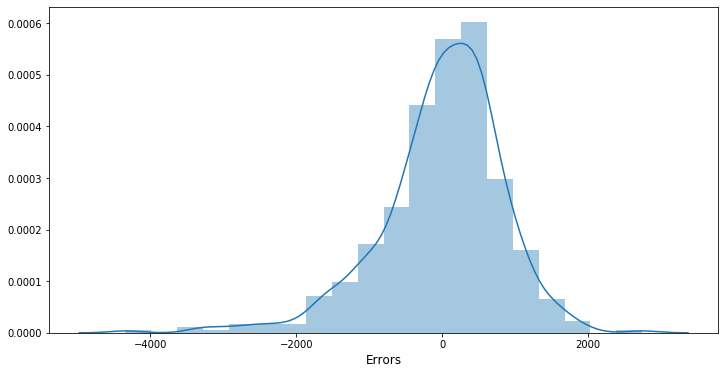

In [57]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred

# Create a figure
fig = plt.figure(figsize=(12, 6))

# Use sns.distplot to plot the residuals with bins and KDE
sns.distplot(residuals, bins=20, kde=True)

# Add labels and display the plot
plt.xlabel('Errors', fontsize=12)
plt.show()

### Error Terms

The error terms follow a normal distribution. This means most errors cluster around the mean value. As you move away from the mean, fewer errors occur. The normal distribution forms a bell-shaped curve, with the highest point at the mean. 

The symmetry of the curve indicates that errors are equally likely to be positive or negative. This distribution is important because it helps in making predictions and understanding the reliability of the model. When error terms follow a normal distribution, the model’s assumptions hold true, improving its accuracy and performance.

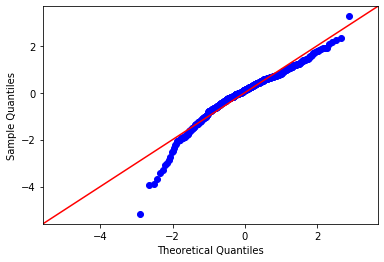

In [58]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### Q-Q plot

We can verify the conclusion by using a Q-Q plot. In this plot, most of the data points fall along the straight line. This alignment shows that the error terms follow a normal distribution. When the points closely follow the line, it confirms that the residuals are normally distributed. 

If the points deviate significantly from the line, it would indicate non-normality in the error terms. In this case, the Q-Q plot supports the assumption that the errors are normally distributed. This is a key condition for validating the linear regression model and ensuring accurate results.

### Homoscedasticity

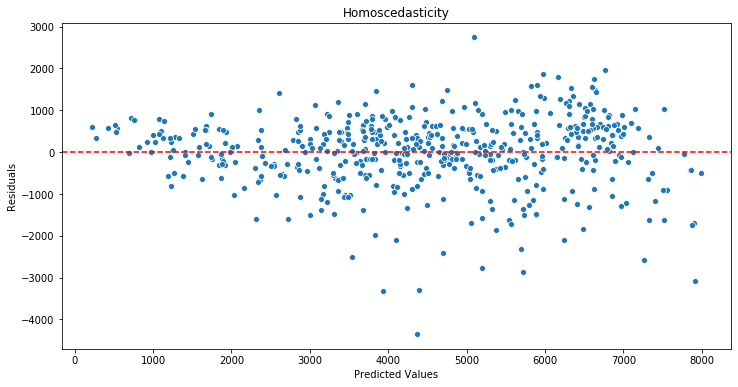

In [59]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot scatterplot for homoscedasticity check
sns.scatterplot(x=y_train_pred, y=residuals)

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')

# Add a horizontal reference line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Display the plot
plt.show()

- The variance of residuals remains constant at all levels of the independent variables.
- This shows consistent variability across different values.
- It ensures the model's predictions are stable and reliable.
- Consistent variance is crucial for accurate regression results.
- This condition is known as homoscedasticity.
- Violations of this can lead to biased coefficient estimates.

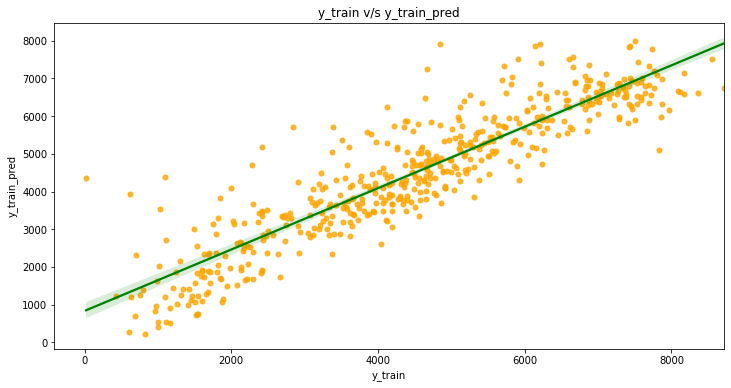

In [60]:
# Set figure size
plt.figure(figsize=(12, 6))

# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'green'}, scatter_kws={'s': 25, 'color': 'orange'})

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [61]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Square Error
rmse_train = np.sqrt(mse_train)

print("Root Mean Square Error: {0}".format(round(rmse_train,3)))

Root Mean Square Error: 841.883


The linear model's assumptions are satisfied. This means the model is well-trained and ready for testing. Now, we can proceed to make predictions using the final model on the test set.

## Step 8: Last Step - Evaluating the Final Model on the Test Set

Let's evaluate how well the model performs on this new data. By applying the model to the test set, we can see how accurately it predicts outcomes based on the independent variables. This step is crucial for assessing the model's effectiveness in real-world scenarios. After making predictions, we will compare the results with the actual values to determine the model's accuracy. This process will help us understand how well the model generalizes to unseen data. Now, let's move forward and make those predictions!

In [62]:
# Keep only the selected features from the final model.
X_test_scaled = X_test_scaled[X_train_rfe_featured_Model_7.columns]
X_test_scaled.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,September,Monday
184,-1.01777,6.189321,1.306004,0.048287,-1.396242,-0.572078,-0.575091,-0.295354,-0.408248
535,0.98254,-0.161569,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.295354,-0.408248
299,-1.01777,-0.161569,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.295354,-0.408248
221,-1.01777,-0.161569,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.295354,-0.408248
152,-1.01777,-0.161569,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.295354,-0.408248


In [63]:
# Add a constant to the test set.
X_test_sm = sm.add_constant(X_test_scaled)

In [64]:
X_test_sm.shape

(219, 10)

In [65]:
# Obtain the predicted values from the linear model.
y_test_pred = model.predict(X_test_sm)

### Calculating $R^2$ Scores and Adjusted $R^2$ Scores for the Test Set

In [66]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
print("R2 Score: {0}".format(r2_score_test))

R2 Score: 0.8


In [67]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test_scaled.columns)), 2)
print("Adjusted R2 Score: {0}".format(adj_r2_score_test))

Adjusted R2 Score: 0.8


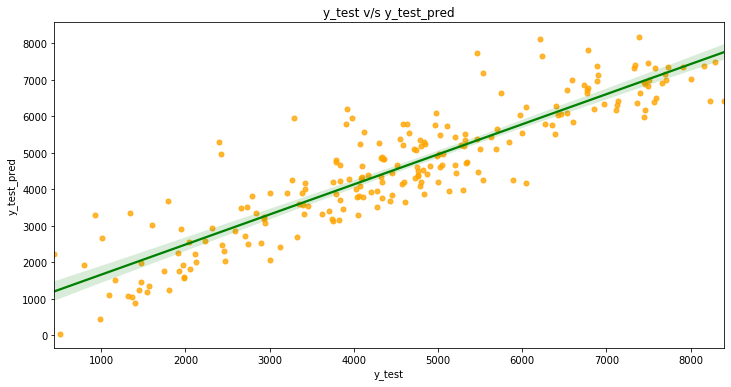

In [68]:
# Set figure size
plt.figure(figsize=(12, 6))

# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'green'}, scatter_kws={'s': 25, 'color': 'orange'})

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

In [69]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Square Error
rmse_test = np.sqrt(mse_test)

print("Root Mean Square Error for Test Set: {0}".format(round(rmse_test,3)))

Root Mean Square Error for Test Set: 837.866


In [70]:
# Coefficients of the final model
round(model.params, 2)

const        4491.30
yr            997.29
holiday      -124.38
temp         1170.38
hum          -432.18
windspeed    -347.50
Summer        342.30
Winter        528.64
September     239.29
Monday       -113.00
dtype: float64

### Equation of the best fit line

In a multivariate linear regression model, the equation of the best-fit line is given by:

$Y = $$\beta_0$$ + $$\beta_1X_1$$ + $$\beta_2X_2$$ + $$\ldots$$ + $$\beta_nX_n$

- \( Y \): Dependent variable (the variable being predicted), `cnt` in this case.
- \( $\beta_0$ ): Y-intercept

- ( $\beta_1$, $\beta_2$, $\ldots$, $\beta_n$ ): Coefficients for the independent variables ( $X_1$, $X_2$, $\ldots$, $X_n$ \) respectively.

The coefficients are determined through a process that minimizes the sum of squared differences between predicted and actual values. The resulting line provides the best linear fit to the multivariate data.

### Best Fit Line Equation for the Model

For our model, the best fit line is determined by the following equation:

***cnt*** = 4491.30 + 997.29 x ***yr*** - 124.38 x ***holiday*** + 1170.38 x ***temp*** - 432.18 x ***hum*** - 347.50 x ***windspeed*** + 342.30 x ***Summer*** + 528.64 x ***Winter*** + 239.29 x ***September*** - 113.00 x ***Monday***

Here are some recommendations based on the best fit line:

1. **Promote Rentals During Warmer Months**: Since higher temperatures lead to increased bike rentals, marketing efforts should focus on promoting bike-sharing services during warmer months, especially in spring and summer.

2. **Adjust Pricing for Holidays**: Consider offering special promotions or discounts during holidays to encourage rentals. Understanding that rentals may decrease during these times can help tailor strategies to boost usage.

3. **Monitor Weather Conditions**: Implement a weather monitoring system to adjust marketing strategies based on forecasted conditions. If high humidity or wind is expected, promotional efforts could focus on alternative modes of transport.

4. **Enhance Fleet Availability in Peak Seasons**: Analyze historical data to predict peak rental times and ensure adequate bike availability during those periods. This approach can enhance customer satisfaction and increase revenue.

5. **Develop Targeted Marketing Campaigns**: Use insights from the model to create targeted campaigns that address specific customer needs based on environmental factors and seasonal trends.

6. **Conduct User Surveys**: Gather feedback from users regarding their experiences in different weather conditions. This information can help refine service offerings and improve user engagement.

7. **Invest in Infrastructure**: Improve bike storage and docking stations in high-demand areas during peak seasons to accommodate increased rentals.

By implementing these recommendations, bike-sharing companies can optimize operations and enhance customer satisfaction, ultimately leading to increased usage and profitability.

### Comparing $R^2$ Scores and Adjusted $R^2$ Scores for training and test set

In [71]:
# Calculate R² and Adjusted R² scores for the training set
r2_score_train = round(model.rsquared, 2)
adj_r2_score_train = round(model.rsquared_adj, 2)

# Format the scores for better readability
formatted_train_r2 = format(r2_score_train, ".3f")
formatted_train_adj_r2 = format(adj_r2_score_train, ".3f")
formatted_test_r2 = format(r2_score_test, ".3f")
formatted_test_adj_r2 = format(adj_r2_score_test, ".3f")

# Print R² and Adjusted R² scores for both training and test sets
print(f'Training Set: \n\tR²: {formatted_train_r2}\n\tAdjusted R²: {formatted_train_adj_r2}\n')
print(f'Test Set: \n\tR²: {formatted_test_r2}\n\tAdjusted R²: {formatted_test_adj_r2}')

Training Set: 
	R²: 0.810
	Adjusted R²: 0.810

Test Set: 
	R²: 0.800
	Adjusted R²: 0.800


The close alignment of $R^2$ and adjusted $R^2$ values between the training and test sets indicates effective generalization in the linear regression model. The $R^2$ values are **0.810 for the training set** and **0.800 for the test set**. Similarly, the adjusted $R^2$ values are also aligned, with 0.810 for training and 0.800 for testing.

This similarity shows that the model is not overfitting the training data. Overfitting happens when a model learns the training data too well, capturing noise instead of the underlying pattern. When this occurs, the model performs poorly on new, unseen data.

The consistent $R^2$ values suggest that the model can generalize well to different datasets. This capability is crucial for practical applications, as it ensures reliable predictions in real-world scenarios. A well-generalized model can adapt to new situations and provide accurate outcomes.

Overall, the alignment of $R^2$ and adjusted $R^2$ values reflects the model's robustness. It indicates that the model has learned meaningful patterns in the training data while remaining flexible enough to handle new inputs. This balance between fitting the training data and generalizing to new data is essential for the success of predictive modeling.

## Conclusion

In conclusion, the best fit line equation provides valuable insights into the factors influencing bike rentals. The equation can predict the count of bike rentals (cnt) based on various independent variables. For our model, the best fit line is determined by the following equation:

***cnt*** = 4491.30 + 997.29 x ***yr*** - 124.38 x ***holiday*** + 1170.38 x ***temp*** - 432.18 x ***hum*** - 347.50 x ***windspeed*** + 342.30 x ***Summer*** + 528.64 x ***Winter*** + 239.29 x ***September*** - 113.00 x ***Monday***

The positive coefficient for "yr" indicates that as the year increases, bike rentals tend to rise, reflecting growing popularity. "Temp" also has a strong positive impact, suggesting that higher temperatures lead to more rentals. Seasonal variables like "Summer" and "Winter" further confirm that specific times of the year significantly affect bike usage.

On the other hand, some factors have negative coefficients. The "holiday" variable shows that bike rentals decrease during holidays, likely due to changes in people's schedules. Similarly, "hum" and "windspeed" negatively affect rentals, indicating that high humidity and wind deter users.

The equation highlights the importance of environmental conditions and seasonal trends in bike sharing. By understanding these relationships, bike-sharing companies can optimize their services and marketing strategies. 

Overall, this model serves as a crucial tool for predicting bike rental demand. It helps stakeholders make informed decisions based on data-driven insights. Future adjustments and refinements to the model can enhance its accuracy, ultimately benefiting both the providers and users of bike-sharing services.

Here are recommendations based on the analysis of the best fit line equation for bike rentals:

### Recommendations for BoomBikes Bike-Sharing Services

1. **Increase Availability During Warm Months:**
   - Given the positive relationship between temperature and bike rentals, bike-sharing companies should increase the availability of bikes during warmer months. 
   - This can be done by deploying more bikes in popular areas, ensuring higher accessibility.

2. **Seasonal Promotions:**
   - Launch promotional campaigns during peak seasons, especially summer. 
   - Offer discounts or incentives for rentals during high-demand periods to maximize usage.

3. **Monitor Weather Conditions:**
   - Implement a weather tracking system to monitor humidity and windspeed. 
   - Adjust bike availability based on weather forecasts, deploying fewer bikes during adverse weather conditions that discourage rentals.

4. **Target Marketing Strategies:**
   - Use data analytics to identify the best times for marketing efforts. 
   - Promote bike rentals more aggressively during spring and summer while scaling back during holidays and periods of typically low demand.

5. **Educate Users About Benefits:**
   - Create awareness campaigns highlighting the benefits of biking during favorable weather conditions. 
   - Emphasize the convenience and enjoyment of biking, particularly in good weather.

6. **Utilize Data for Decision Making:**
   - Regularly analyze rental data to identify trends and patterns. 
   - Use these insights to refine strategies and respond to changing user behaviors and preferences.

7. **Improve Bike Infrastructure:**
   - Collaborate with local governments to enhance biking infrastructure. 
   - This includes adding bike lanes, parking areas, and repair stations to make biking safer and more convenient.

8. **Address Holiday Declines:**
   - Analyze rental patterns during holidays to understand declines better. 
   - Consider offering special holiday-themed promotions or events to encourage rentals during these times.

9. **Enhance User Experience:**
   - Invest in user-friendly technology for rentals. 
   - A seamless booking and payment process can attract more users, especially during peak times.

10. **Conduct Regular Surveys:**
    - Gather feedback from users regarding their experiences. 
    - Use this feedback to improve services and address any issues that may deter users from renting bikes.

11. **Engage with Community:**
    - Participate in community events to promote the bike-sharing service. 
    - Build partnerships with local businesses to offer combined promotions, encouraging more people to use bikes.

12. **Expand to New Locations:**
    - Explore opportunities to expand the bike-sharing service to new areas. 
    - Target neighborhoods that may have less access to biking options but show potential demand.

13. **Use Incentives for Off-Peak Times:**
    - Create incentives for users to rent bikes during off-peak hours. 
    - This could help balance demand and improve overall rental rates throughout the day.

14. **Focus on Sustainability:**
    - Promote biking as an eco-friendly transportation alternative. 
    - Highlight the environmental benefits to attract users who prioritize sustainability.

15. **Continuous Model Refinement:**
    - Regularly update the predictive model with new data. 
    - Refining the model can enhance accuracy, leading to better strategic decisions.

### Summary

Implementing these recommendations can help bike-sharing companies optimize their operations and improve rental rates. By leveraging data-driven insights, focusing on user experience, and adapting to seasonal trends, these services can become more efficient and appealing to a broader audience. This proactive approach will not only enhance profitability but also contribute positively to urban mobility and environmental sustainability.